# Anaerobic Digestion (AD)

In [6]:
# Import libraries
from swolfpy_processmodels import AD
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set font for plots
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "12"

# Set specs for pandas
pd.set_option('display.max_colwidth', 0)
pd.set_option('display.max_rows', 500)

In [43]:
model = AD()
model.calc()
report=model.report()
results = model.FinalCompost.data[['mass']]


model = AD()
Composition = pd.Series(np.zeros(len(model.Index)), index=model.Index)
Composition['Food_Waste_Vegetable'] = 0.45
Composition['Food_Waste_Non_Vegetable'] = 0.55
model.Assumed_Comp = Composition
model.calc()
report=model.report()
results['New'] = model.FinalCompost.data['mass'].values
results

,mass,New
Yard_Trimmings_Leaves,2000.933856,2000.933856
Yard_Trimmings_Grass,511.069617,511.069617
Yard_Trimmings_Branches,1943.367984,1943.367984
Food_Waste_Vegetable,194.557997,194.557997
Food_Waste_Non_Vegetable,342.081796,342.081796
Wood,2232.710471,2232.710471
Wood_Other,1905.119811,1905.119811
Textiles,1702.041457,1702.041457
Rubber_Leather,2426.741360,2426.741360
Newsprint,1914.923909,1914.923909


In [44]:
model.liq_treatment_vol

array([2.42413618, 0.85921748, 2.2802725 , 0.69141025, 0.90515815,
       2.04206813, 1.74374886, 2.07715406, 2.1731    , 2.09021699,
       2.12828074, 2.42442289, 2.38961868, 2.41850692, 1.89434734,
       2.4117249 , 2.27030581, 2.52672394, 0.13387369, 0.13387369,
       0.13389404, 0.13387369, 0.13119085, 0.13145914, 0.13413178,
       0.12457765, 0.11643523, 0.11643523, 0.13414198, 0.13414198,
       0.13414198, 0.13414198, 0.13414198, 0.12739463, 0.12954091,
       0.11804494, 0.12381304, 0.12019121, 1.02300516, 0.13414198,
       0.13414198, 2.68283951, 2.68283951, 2.41455556, 2.68314535,
       1.46214753])

Yard_Trimmings_Leaves            2000.933856
Yard_Trimmings_Grass             511.069617 
Yard_Trimmings_Branches          1943.367984
Food_Waste_Vegetable             194.557997 
Food_Waste_Non_Vegetable         342.081796 
Wood                             2232.710471
Wood_Other                       1905.119811
Textiles                         1702.041457
Rubber_Leather                   2426.741360
Newsprint                        1914.923909
Corr_Cardboard                   1801.051536
Office_Paper                     1784.176947
Magazines                        2064.708328
Third_Class_Mail                 2105.321905
Folding_Containers               1652.355782
Paper_Bags                       1981.920487
Mixed_Paper                      1961.600586
Paper_Non_recyclable             1818.491586
HDPE_Translucent_Containers      149.499252 
HDPE_Pigmented_Containers        149.499252 
PET_Containers                   149.439452 
Plastic_Other_1_Polypropylene    149.499252 
Plastic_Ot

pandas.core.series.Series

In [2]:

model.calc()
report=model.report()

## Waste products
* Only waste product is *Other_Residuals*

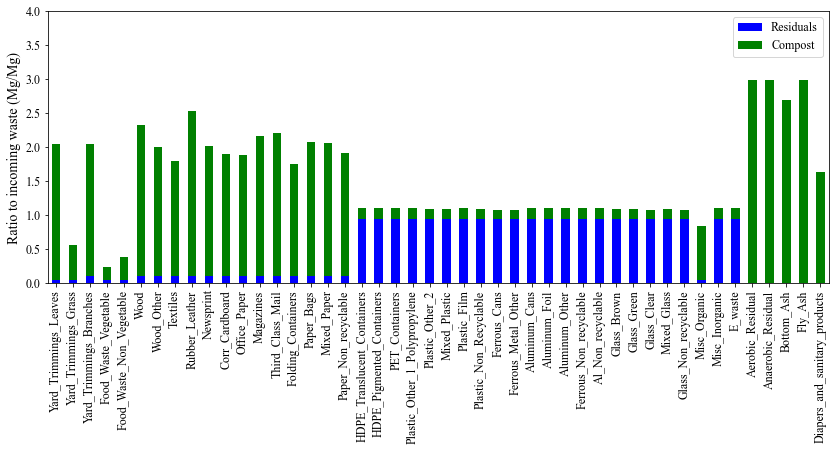

In [4]:
OtherResidual = model.S2_residuls.data['mass'].values/1000
Compost = model.FinalCompost.data['mass'].values/1000

WasteProductsDf = pd.DataFrame({'Residuals': OtherResidual, 'Compost': Compost}) 

fig, ax=plt.subplots(figsize=(14, 5))
WasteProductsDf.plot(kind='bar', stacked=True, ax=ax, color=['b','g'])

ax.set_ylim((0,4))
ax.set_ylabel('Ratio to incoming waste (Mg/Mg)', fontdict={'size':14})
ticks = ax.set_xticklabels(model.Index, rotation=90)

## Carbon balance/fate
* Carbon monoxide (CO) emissions from the biogas combunstion are not included in carbon balance. The CO emissions are calculated by the engine emission factors which are input data.

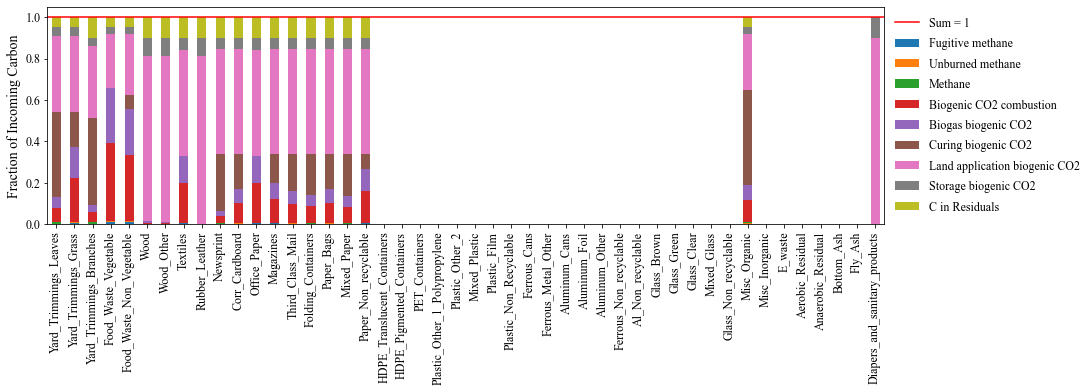

In [5]:
model = AD()
model.InputData.AD_operation['choice_BU']['amount'] = 1
model.calc()
Income_C = model.Input.data['sol_cont']*model.Material_Properties['Biogenic Carbon Content']/100
C_CO2 = model.CommonData.MW['C']['amount']/model.CommonData.MW['CO2']['amount']
C_CH4 = model.CommonData.MW['C']['amount']/model.CommonData.MW['CH4']['amount']


C_balance_DF = pd.DataFrame(index=model.Index)

C_balance_DF.loc[:,'Fugitive methane'] = model.LCI['Fugitive (Leaked) Methane'] * C_CH4 / Income_C
C_balance_DF.loc[:,'Unburned methane'] = model.LCI['Methane, non-fossil (unburned)'] * C_CH4 / Income_C
C_balance_DF.loc[:,'Methane'] = model.LCI['Methane, non-fossil'] * C_CH4 / Income_C
C_balance_DF.loc[:,'Biogenic CO2 combustion'] = model.LCI['Carbon dioxide, non-fossil from comubstion'] * C_CO2 / Income_C
C_balance_DF.loc[:,'Biogas biogenic CO2'] = model.LCI['Carbon dioxide, non-fossil (in biogas)'] * C_CO2 / Income_C
C_balance_DF.loc[:,'Curing biogenic CO2'] = model.LCI['Carbon dioxide, non-fossil _ Curing'] * C_CO2 / Income_C
C_balance_DF.loc[:,'Land application biogenic CO2'] = model.LCI['Carbon dioxide, non-fossil _ Land application'] * C_CO2 / Income_C
C_balance_DF.loc[:,'Storage biogenic CO2'] = - model.LCI['Direct Carbon Storage and Humus Formation'] * C_CO2 / Income_C
C_balance_DF.loc[:,'C in Residuals'] = model.S2_residuls.data['sol_cont'] * model.Material_Properties['Biogenic Carbon Content']/100 / Income_C 

fig, ax=plt.subplots(figsize=(15, 4))
#C_balance_DF.loc[C_balance_DF.sum(axis=1)>0,:].plot(kind='bar', stacked=True, ax=ax)
C_balance_DF.plot(kind='bar', stacked=True, ax=ax)

ax.plot([-0.5,46],[1,1],c='r',label='Sum = 1')
ax.set_ylabel('Fraction of Incoming Carbon',size=14)
legend = ax.legend(frameon=False, labelspacing=0.7, bbox_to_anchor=(1, 1), loc='upper left')

## Nitrogen balance
* AD model is not reporting the N losses during curing and dewatering

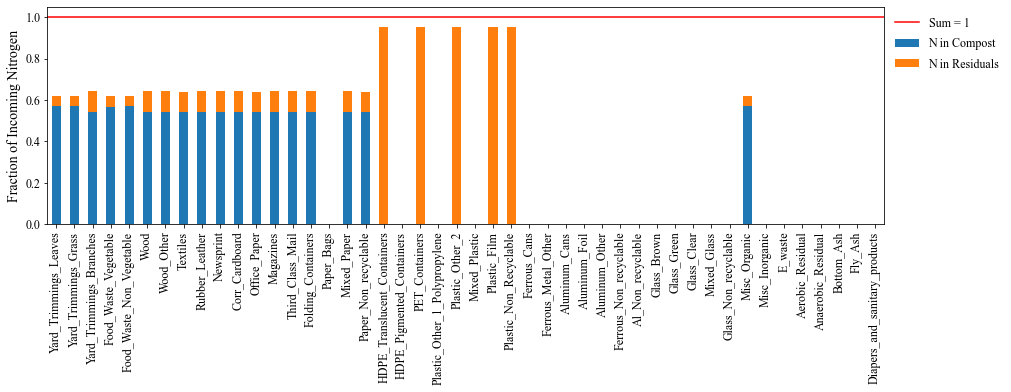

In [6]:
model = AD()
model.calc()
Income_N = model.Input.data['sol_cont']*model.Material_Properties['Nitrogen Content']/100

N_balance_DF = pd.DataFrame(index=model.Index)

N_balance_DF.loc[:,'N in Compost'] =  model.FinalCompost.data['N_cont'] / Income_N 
N_balance_DF.loc[:,'N in Residuals'] =  model.S2_residuls.data['sol_cont'] * model.Material_Properties['Nitrogen Content']/100 / Income_N 

fig, ax=plt.subplots(figsize=(15, 4))
N_balance_DF.plot(kind='bar', stacked=True, ax=ax)

ax.plot([-0.5,46],[1,1],c='r',label='Sum = 1')
ax.set_ylabel('Fraction of Incoming Nitrogen',size=14)
legend = ax.legend(frameon=False, labelspacing=0.7, bbox_to_anchor=(1, 1), loc='upper left')

## Nitrogen fate
* Nitrogen oxides (NO2) emissions from the biogas combunstion are not included in nitrogen balance. The NOx emissions are calculated by the engine emission factors which are input data.

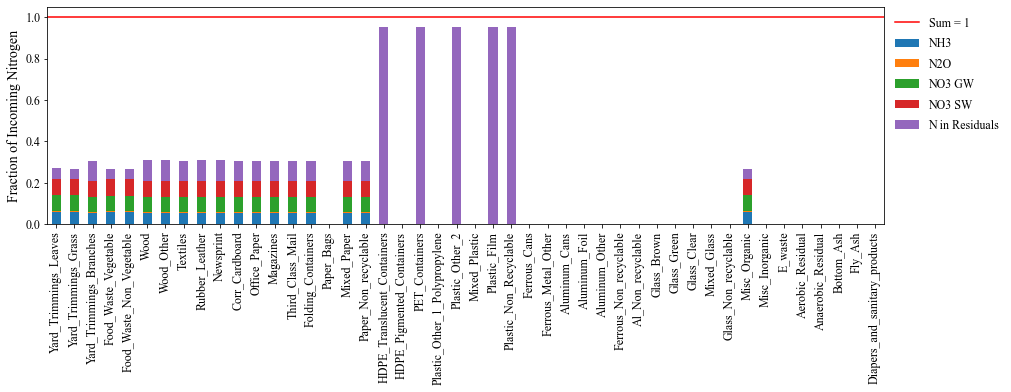

In [7]:
model = AD()
model.InputData.AD_operation['choice_BU']['amount'] = 1
model.InputData.AD_operation['fertOff']['amount'] = 0
model.CommonData.Land_app['MFEN']['amount'] = 0
model.calc()
Income_N = model.Input.data['sol_cont']*model.Material_Properties['Nitrogen Content']/100
N_NH3 = model.CommonData.MW['N']['amount']/(model.CommonData.MW['N']['amount'] + 3 * model.CommonData.MW['H']['amount'])
N_N2O = model.CommonData.MW['N']['amount']/(model.CommonData.MW['N']['amount'] * 2 + model.CommonData.MW['O']['amount'])
N_NO3 = model.CommonData.MW['N']['amount']/(model.CommonData.MW['N']['amount'] + 3 * model.CommonData.MW['O']['amount'])

N_balance_DF = pd.DataFrame(index=model.Index)

N_balance_DF.loc[:,'NH3'] = model.LCI['Ammonia'] * N_NH3 / Income_N
N_balance_DF.loc[:,'N2O'] = model.LCI['Dinitrogen monoxide'] * N_N2O / Income_N
N_balance_DF.loc[:,'NO3 GW'] = model.LCI['Nitrate (ground water)'] * N_NO3 / Income_N
N_balance_DF.loc[:,'NO3 SW'] = model.LCI['Nitrate (Surface water)'] * N_NO3 / Income_N
N_balance_DF.loc[:,'N in Residuals'] =  model.S2_residuls.data['sol_cont'] * model.Material_Properties['Nitrogen Content']/100 / Income_N 

fig, ax=plt.subplots(figsize=(15, 4))
N_balance_DF.plot(kind='bar', stacked=True, ax=ax)

ax.plot([-0.5,46],[1,1],c='r',label='Sum = 1')
ax.set_ylabel('Fraction of Incoming Nitrogen',size=14)
legend = ax.legend(frameon=False, labelspacing=0.7, bbox_to_anchor=(1, 1), loc='upper left')  

### The NOx emissions are high!! Check the contribution

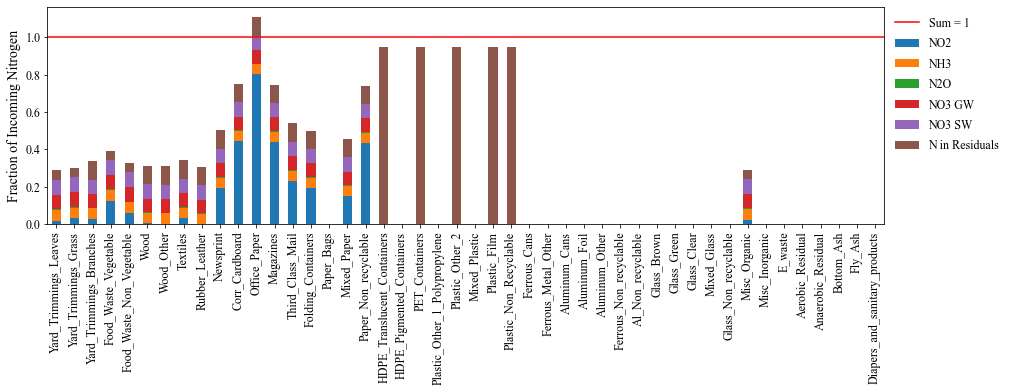

In [8]:
model = AD()
model.InputData.AD_operation['choice_BU']['amount'] = 1
model.InputData.AD_operation['fertOff']['amount'] = 0
model.CommonData.Land_app['MFEN']['amount'] = 0
model.calc()
Income_N = model.Input.data['sol_cont']*model.Material_Properties['Nitrogen Content']/100
N_NO2 = model.CommonData.MW['N']['amount']/(model.CommonData.MW['N']['amount'] + 2 * model.CommonData.MW['O']['amount'])
N_NH3 = model.CommonData.MW['N']['amount']/(model.CommonData.MW['N']['amount'] + 3 * model.CommonData.MW['H']['amount'])
N_N2O = model.CommonData.MW['N']['amount']/(model.CommonData.MW['N']['amount'] * 2 + model.CommonData.MW['O']['amount'])
N_NO3 = model.CommonData.MW['N']['amount']/(model.CommonData.MW['N']['amount'] + 3 * model.CommonData.MW['O']['amount'])

N_balance_DF = pd.DataFrame(index=model.Index)

N_balance_DF.loc[:,'NO2'] = model.LCI['Nitrogen oxides (as NO2)'] * N_NO2 / Income_N
N_balance_DF.loc[:,'NH3'] = model.LCI['Ammonia'] * N_NH3 / Income_N
N_balance_DF.loc[:,'N2O'] = model.LCI['Dinitrogen monoxide'] * N_N2O / Income_N
N_balance_DF.loc[:,'NO3 GW'] = model.LCI['Nitrate (ground water)'] * N_NO3 / Income_N
N_balance_DF.loc[:,'NO3 SW'] = model.LCI['Nitrate (Surface water)'] * N_NO3 / Income_N
N_balance_DF.loc[:,'N in Residuals'] =  model.S2_residuls.data['sol_cont'] * model.Material_Properties['Nitrogen Content']/100 / Income_N 

fig, ax=plt.subplots(figsize=(15, 4))
N_balance_DF.plot(kind='bar', stacked=True, ax=ax)

ax.plot([-0.5,46],[1,1],c='r',label='Sum = 1')
ax.set_ylabel('Fraction of Incoming Nitrogen',size=14)
legend = ax.legend(frameon=False, labelspacing=0.7, bbox_to_anchor=(1, 1), loc='upper left')                                                      